In [3]:
import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

### Create Driver

In [113]:
driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 102.0.5005
[WDM] - Get LATEST chromedriver version for 102.0.5005 google-chrome
[WDM] - Driver [C:\Users\krhen\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache
c:\users\krhen\desktop\python practice\witcher project\env\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  """Entry point for launching an IPython kernel.


In [114]:
page_url = 'https://witcher.fandom.com/wiki/Category:Characters_in_the_stories'
driver.get(page_url)

In [131]:
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

#driver.find_element(By.XPATH, '//div[text()="ACCEPT"]').click()

### Find Books

In [117]:
book_categories = driver.find_elements(by=By.CLASS_NAME, value='category-page__member-link')
book_categories[len(book_categories)-1].text

'Category:Time of Contempt characters'

In [118]:
book_categories[0].get_attribute('href')

'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'

In [119]:
driver.get(book_categories[0].get_attribute('href'))

In [120]:
character_elements = driver.find_elements(by=By.CLASS_NAME, value='category-page__member-link')
character_elements[0].text

'Adalia'

### Full Code

In [132]:
#Create driver
driver = webdriver.Chrome(ChromeDriverManager().install())

#Go to the webpage with catelogs of book series
page_url = 'https://witcher.fandom.com/wiki/Category:Characters_in_the_stories'
driver.get(page_url)

#Click on Accept for cookies tracks if there is one
time.sleep(3) # ask driver to wait for a few seconds in order for web page to be fully loaded before web scraping

#To click accept cookie tracker if there is a pop-up prompt else procceed forward with scraping and finding element for character class name.
try:
    driver.find_element(By.XPATH, '//div[text()="ACCEPT"]').click()
except NoSuchElementException:
    print("No Cookies permission requested.")
finally:
    #Find books on the page
    book_categories = driver.find_elements(by=By.CLASS_NAME, value='category-page__member-link')
    books = []
    for category in book_categories:
        book_url = category.get_attribute('href')
        book_name = category.text
        books.append({'book_name': book_name, 'book_url': book_url})

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 102.0.5005
[WDM] - Get LATEST chromedriver version for 102.0.5005 google-chrome
[WDM] - Driver [C:\Users\krhen\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache
c:\users\krhen\desktop\python practice\witcher project\env\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  


No Cookies permission requested.


In [133]:
books

[{'book_name': 'Category:Baptism of Fire characters',
  'book_url': 'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'},
 {'book_name': 'Category:Blood of Elves characters',
  'book_url': 'https://witcher.fandom.com/wiki/Category:Blood_of_Elves_characters'},
 {'book_name': "Godamba Thaess'en",
  'book_url': 'https://witcher.fandom.com/wiki/Godamba_Thaess%27en'},
 {'book_name': 'Category:Season of Storms characters',
  'book_url': 'https://witcher.fandom.com/wiki/Category:Season_of_Storms_characters'},
 {'book_name': 'Category:Something Ends, Something Begins characters',
  'book_url': 'https://witcher.fandom.com/wiki/Category:Something_Ends,_Something_Begins_characters'},
 {'book_name': 'Category:Sword of Destiny characters',
  'book_url': 'https://witcher.fandom.com/wiki/Category:Sword_of_Destiny_characters'},
 {'book_name': 'Category:Szpony i kły characters',
  'book_url': 'https://witcher.fandom.com/wiki/Category:Szpony_i_k%C5%82y_characters'},
 {'book_name': 'Cat

In [134]:
character_list=[]

for book in books:
    # go to book page
    driver.get(book['book_url'])
    character_elements = driver.find_elements(by=By.CLASS_NAME, value='category-page__member-link') # character_elements is a list with elements of character names
    
    for character in character_elements:
        character_list.append({'book': book['book_name'], 'character': character.text})

In [135]:
character_df = pd.DataFrame(character_list)
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)
pd.set_option("display.width", 500)
character_df.head(50)

book                               character
0   Category:Baptism of Fire characters                                  Adalia
1   Category:Baptism of Fire characters                                   Adela
2   Category:Baptism of Fire characters                           Aen Saevherne
3   Category:Baptism of Fire characters                                Aevenien
4   Category:Baptism of Fire characters                                  Aglaïs
5   Category:Baptism of Fire characters                                 Albrich
6   Category:Baptism of Fire characters                                  Amavet
7   Category:Baptism of Fire characters                           Angus Bri Cri
8   Category:Baptism of Fire characters                             Anna Kameny
9   Category:Baptism of Fire characters                            Anzelm Aubry
10  Category:Baptism of Fire characters                        Artaud Terranova
11  Category:Baptism of Fire characters                                    Asse
12  Category:Baptism of Fire characters                       Assire var Anahid
13  Category:Baptism of Fire characters                      Aubry (first born)
14  Category:Baptism of Fire characters                          Augusta Wagner
15  Category:Baptism of Fire characters                        Baron of Casadei
16  Category:Baptism of Fire characters                        Beatrix of Kovir
17  Category:Baptism of Fire characters                                  Bronik
18  Category:Baptism of Fire characters                            Brouver Hoog
19  Category:Baptism of Fire characters         Cahir Mawr Dyffryn aep Ceallach
20  Category:Baptism of Fire characters                                Calanthe
21  Category:Baptism of Fire characters                          Caleb Stratton
22  Category:Baptism of Fire characters                                 Carduin
23  Category:Baptism of Fire characters                    Ceallach aep Gruffyd
24  Category:Baptism of Fire characters                                   Cerro
25  Category:Baptism of Fire characters                       Ciaran aep Dearbh
26  Category:Baptism of Fire characters                                    Ciri
27  Category:Baptism of Fire characters                Cirilla Fiona (imposter)
28  Category:Baptism of Fire characters                              Codringher
29  Category:Baptism of Fire characters                        Coinneach Dá Reo
30  Category:Baptism of Fire characters                                  Connor
31  Category:Baptism of Fire characters                                 Coram I
32  Category:Baptism of Fire characters                                Coram II
33  Category:Baptism of Fire characters                                 Corbett
34  Category:Baptism of Fire characters                        Cosmo Baldenvegg
35  Category:Baptism of Fire characters                            Count Lanier
36  Category:Baptism of Fire characters                        Cregennan of Lod
37  Category:Baptism of Fire characters                                 Crispin
38  Category:Baptism of Fire characters                                 Dagorad
39  Category:Baptism of Fire characters                               Dandelion
40  Category:Baptism of Fire characters                       Daniel Etcheverry
41  Category:Baptism of Fire characters                            Demavend III
42  Category:Baptism of Fire characters                      Echel Traighlethan
43  Category:Baptism of Fire characters                               Effenberg
44  Category:Baptism of Fire characters                                  Eithné
45  Category:Baptism of Fire characters                              Elan Trahe
46  Category:Baptism of Fire characters                         Elen of Kaedwen
47  Category:Baptism of Fire characters                        Emhyr var Emreis
48  Category:Baptism of Fire characters  Emiel Regis Rohellec Terzieff-Godefroy
49  Category:Baptism of Fire charac

In [136]:
print(character_df['book'].value_counts(sort=False))
print(character_df['book'].value_counts().idxmax())
books_df = pd.DataFrame(books)
books_df
print('\n', "The number", books_df[books_df['book_name']==(character_df['book'].value_counts().idxmax())].index.tolist()[0], 'book has the maximum number of characters.')

Category:Baptism of Fire characters                        147
Category:Blood of Elves characters                         123
Category:Season of Storms characters                       106
Category:Something Ends, Something Begins characters        70
Category:Sword of Destiny characters                       117
Category:Szpony i kły characters                             3
Category:Tales from the world of The Witcher characters      1
Category:The Lady of the Lake characters                   200
Category:The Last Wish characters                          125
Category:The Tower of the Swallow characters               186
Category:Time of Contempt characters                       196
Name: book, dtype: int64
Category:The Lady of the Lake characters

 The number 8 book has the maximum number of characters.


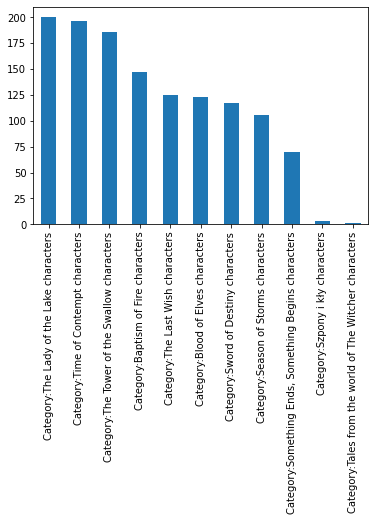

In [137]:
import matplotlib.pyplot as plt

character_df['book'].value_counts().plot(kind='bar')
plt.show()